In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv('/content/bank-full.csv',sep=';')

In [20]:
print(df.shape)
print(df.columns)
df.head()

(45210, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'durations', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,durations,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


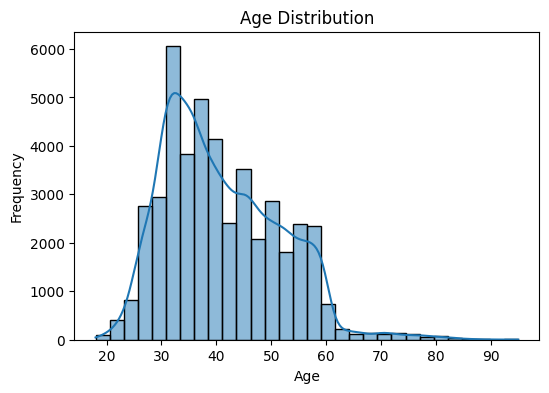

In [21]:
#Explore Features (age, job, marital status)

#Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(x=df['age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

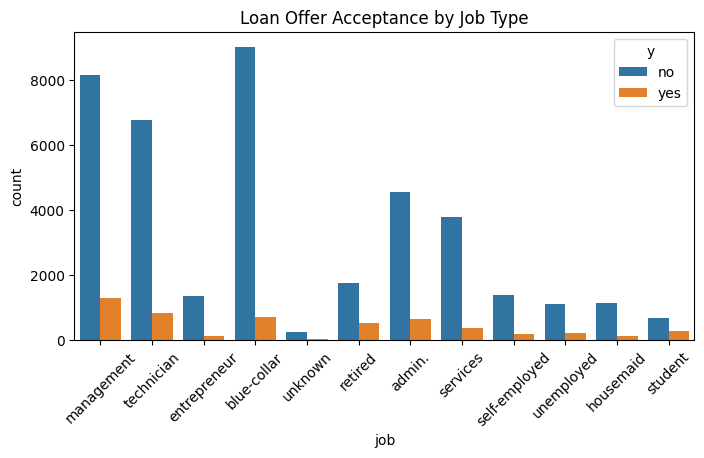

In [22]:
#Job vs Loan Acceptance
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='job',hue='y')
plt.title("Loan Offer Acceptance by Job Type")
plt.xlabel('job')
plt.xticks(rotation=45)
plt.show()

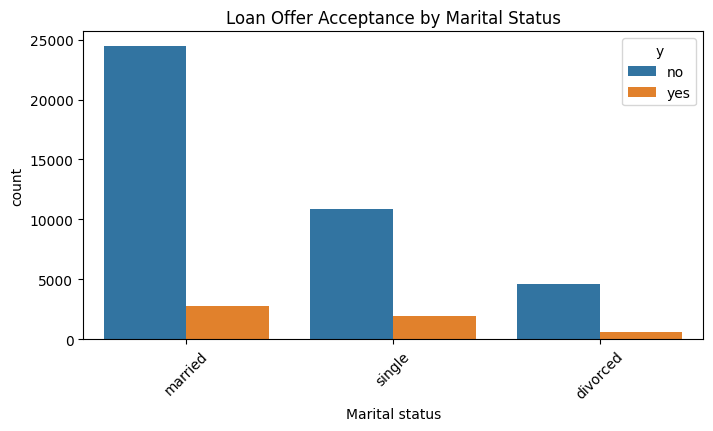

In [23]:
# Marital Status vs Loan Acceptance
plt.figure(figsize=(8,4))
sns.countplot(data=df,x='marital',hue='y')
plt.title("Loan Offer Acceptance by Marital Status")
plt.xlabel('Marital status')
plt.xticks(rotation=45)
plt.show()

In [31]:
#Encode Categorical Variables
df_encoded=pd.get_dummies(df,drop_first=True)
df_encoded['y']=df['y'].map({'yes':1,'no':0})


In [29]:
df_encoded.head()

,age,balance,day,durations,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes,y
0,58,2143,5,261,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,0
1,44,29,5,151,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,0
2,33,2,5,76,1,-1,0,False,True,False,...,False,True,False,False,False,False,False,True,False,0
3,47,1506,5,92,1,-1,0,True,False,False,...,False,True,False,False,False,False,False,True,False,0
4,33,1,5,198,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,True,False,0


In [40]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X=df_encoded.drop('y',axis=1)
Y=df_encoded['y']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [41]:
#Train Classifier (Logistic Regression or Decision Tree)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(X_train,Y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [42]:
#Evaluate Model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
Y_pred=dt.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,Y_pred))
print("Classification_report: ",classification_report(Y_test,Y_pred))
print("Confusion_matrix: ",confusion_matrix(Y_test,Y_pred))

Accuracy:  1.0
Classification_report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00      7949
           1       1.00      1.00      1.00      1093

    accuracy                           1.00      9042
   macro avg       1.00      1.00      1.00      9042
weighted avg       1.00      1.00      1.00      9042

Confusion_matrix:  [[7949    0]
 [   0 1093]]


In [43]:
#Analyze Feature Importance (Business Insight)
importances=pd.Series(dt.feature_importances_,index=X.columns).sort_values(ascending=False)
print(importances.head(10))

y_yes               1.0
balance             0.0
age                 0.0
durations           0.0
campaign            0.0
pdays               0.0
previous            0.0
job_blue-collar     0.0
job_entrepreneur    0.0
job_housemaid       0.0
dtype: float64
